In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install pandas scikit-image mahotas numpy opencv-python matplotlib
!pip install --upgrade scikit-image
!pip install opencv-python-headless numpy
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import gabor
from skimage import io
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

RANDOM_SEED = 42

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.1 MB/s eta 0:00:00


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import feature, filters, color
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.feature import hog
from scipy.fftpack import fft2, fftshift
from typing import List, Tuple
import pandas as pd

# Mapping dictionary
label_mapping = {
    0: 'Cassava Bacterial Blight (CBB)',
    1: 'Cassava Brown Streak Disease (CBSD)',
    2: 'Cassava Green Mottle (CGM)',
    3: 'Cassava Mosaic Disease (CMD)',
    4: 'Healthy'
}

In [61]:
color_stats_train_df  = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/color_stats_train_df.csv')
dominant_colors_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/dominant_colors_train_df.csv')
edge_intensity_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/edge_intensity_stats_train_df.csv')
frequency_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/frequency_stats_train_df.csv')
intensity_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/intensity_stats_train_df.csv')
pca_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/pca_stats_train_df.csv')
hog_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/hog_stats_train_df.csv')
#dominant_colors_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/dominant_colors_train_df.csv')
orientation_stats_train_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/orientation_stats_train_df.csv')

In [62]:
color_stats_val_df  = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/color_stats_val_df.csv')
dominant_colors_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/dominant_colors_val_df.csv')
edge_intensity_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/edge_intensity_stats_val_df.csv')
frequency_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/frequency_stats_val_df.csv')
intensity_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/intensity_stats_val_df.csv')
pca_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/pca_stats_val_df.csv')
hog_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/hog_stats_val_df.csv')
#dominant_colors_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/dominant_colors_val_df.csv')
orientation_stats_val_df = pd.read_csv('/content/drive/MyDrive/DATASCI 281/DATASCI 281 Final Project/Data/features/orientation_stats_val_df.csv')

In [63]:
dataframes = [
    (color_stats_train_df, 'color_stats_'),
    (dominant_colors_train_df, 'dominant_colors_'),
    (edge_intensity_stats_train_df, 'edge_intensity_stats_'),
    (frequency_stats_train_df, 'frequency_stats_'),
    (intensity_stats_train_df, 'intensity_stats_'),
    (pca_stats_train_df, 'pca_stats_'),
    (hog_stats_train_df, 'hog_stats_'),
    (orientation_stats_train_df, 'orientation_stats_'),
    (color_stats_val_df, 'color_stats_val_'),
    (dominant_colors_val_df, 'dominant_colors_val_'),
    (edge_intensity_stats_val_df, 'edge_intensity_stats_val_'),
    (frequency_stats_val_df, 'frequency_stats_val_'),
    (intensity_stats_val_df, 'intensity_stats_val_'),
    (pca_stats_val_df, 'pca_stats_val_'),
    (hog_stats_val_df, 'hog_stats_val_'),
    (orientation_stats_val_df, 'orientation_stats_val_')
]

# Prepend prefixes to all column names in each DataFrame
for df, prefix in dataframes:
    df.columns = [prefix + col if col != 'label' else col for col in df.columns]

\Random Forest Model

In [64]:
import pandas as pd

# Concatenate all feature DataFrames along the columns
features_train_df = pd.concat([color_stats_train_df.drop('label', axis=1),
                               dominant_colors_train_df.drop('label', axis=1),
                               edge_intensity_stats_train_df.drop('label', axis=1),
                               frequency_stats_train_df.drop('label', axis=1),
                               intensity_stats_train_df.drop('label', axis=1),
                               pca_stats_train_df.drop('label', axis=1),
                               hog_stats_train_df.drop('label', axis=1),
                               # dominant_colors_train_df.drop('label', axis=1),
                               orientation_stats_train_df], axis=1)

X_train = features_train_df.drop('label', axis=1)
y_train = features_train_df['label']

In [66]:
features_val_df = pd.concat([color_stats_val_df.drop('label', axis=1),
                             dominant_colors_val_df.drop('label', axis=1),
                             edge_intensity_stats_val_df.drop('label', axis=1),
                             frequency_stats_val_df.drop('label', axis=1),
                             intensity_stats_val_df.drop('label', axis=1),
                             pca_stats_val_df.drop('label', axis=1),
                             hog_stats_val_df.drop('label', axis=1),
                             # dominant_colors_val_df.drop('label', axis=1),
                             orientation_stats_val_df], axis=1)

X_val = features_val_df.drop('label', axis=1)
y_val = features_val_df['label']

In [67]:
X_train.shape

(3684, 32)

In [68]:
label_mapping = {
    'Cassava Bacterial Blight (CBB)': 0,
    'Cassava Green Mottle (CGM)': 2,
    'Healthy': 4,
    'Cassava Mosaic Disease (CMD)': 3,
    'Cassava Brown Streak Disease (CBSD)': 1
}

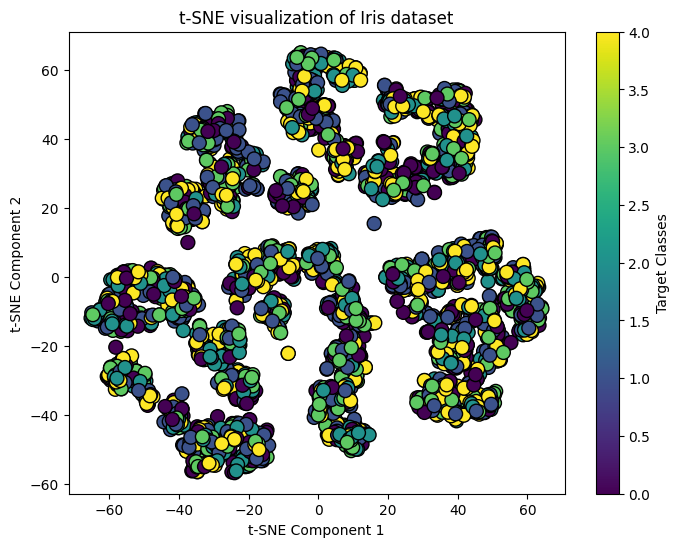

In [69]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X_train)

# Create a scatter plot
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_embedded[:, 0],
                      X_embedded[:, 1],
                      c=y_train,
                      cmap='viridis',
                      edgecolor='k',
                      s=100)

# Add a color bar
plt.colorbar(scatter, label='Target Classes')

# Add labels and title
plt.title('t-SNE visualization of Iris dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Show the plot
plt.show()

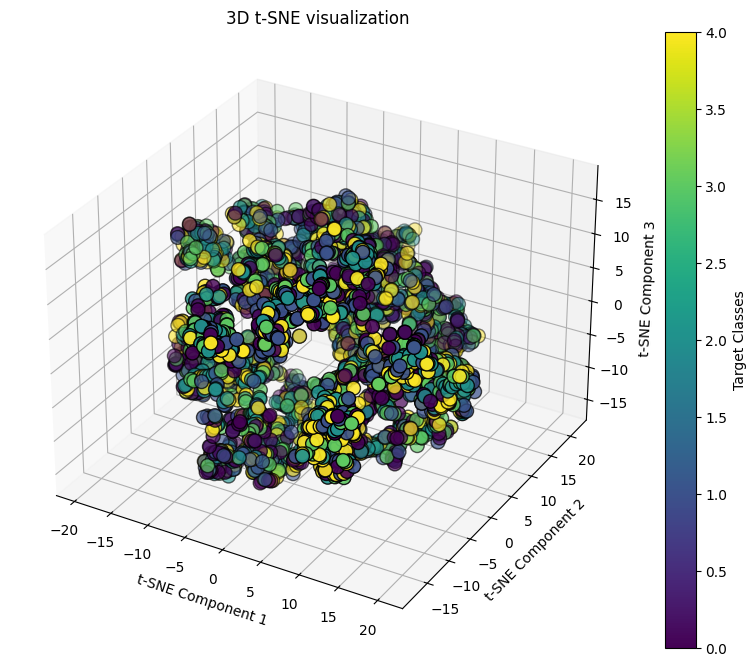

In [39]:
# Initialize t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)

# Fit and transform the data
X_embedded = tsne.fit_transform(X_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X_embedded[:, 0],
                     X_embedded[:, 1],
                     X_embedded[:, 2],
                     c=y_train,
                     cmap='viridis',
                     edgecolor='k', s=100)

# Add a color bar
plt.colorbar(scatter, label='Target Classes')

# Add labels and title
ax.set_title('3D t-SNE visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Show the plot
plt.show()

In [70]:
features_train_df.columns

Index(['color_stats_mean_red', 'color_stats_mean_green',
       'color_stats_mean_blue', 'color_stats_std_red', 'color_stats_std_green',
       'color_stats_std_blue', 'dominant_colors_color_0',
       'dominant_colors_color_1', 'dominant_colors_color_2',
       'dominant_colors_color_3', 'dominant_colors_color_4',
       'dominant_colors_color_5', 'dominant_colors_color_6',
       'dominant_colors_color_7', 'dominant_colors_color_8',
       'dominant_colors_color_9', 'dominant_colors_color_10',
       'dominant_colors_color_11', 'dominant_colors_color_12',
       'dominant_colors_color_13', 'dominant_colors_color_14',
       'edge_intensity_stats_mean_intensity',
       'edge_intensity_stats_std_intensity', 'frequency_stats_mean_magnitude',
       'frequency_stats_std_magnitude', 'intensity_stats_mean_intensity',
       'pca_stats_pca_component_1', 'pca_stats_pca_component_2',
       'hog_stats_mean_hog', 'hog_stats_std_hog',
       'orientation_stats_mean_orientation',
       'orient

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for color_stats_mean_red:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    4.042 0.0037  0.9278  7.1561   True
     0      2   9.4627    0.0  6.3486 12.5769   True
     0      3    6.825    0.0  3.7097  9.9402   True
     0      4   6.5282    0.0   3.414  9.6423   True
     1      2   5.4208    0.0  2.3066  8.5349   True
     1      3    2.783 0.1055 -0.3322  5.8982  False
     1      4   2.4862 0.1879  -0.628  5.6004  False
     2      3  -2.6378 0.1416  -5.753  0.4774  False
     2      4  -2.9346 0.0758 -6.0487  0.1796  False
     3      4  -0.2968  0.999  -3.412  2.8184  False
----------------------------------------------------


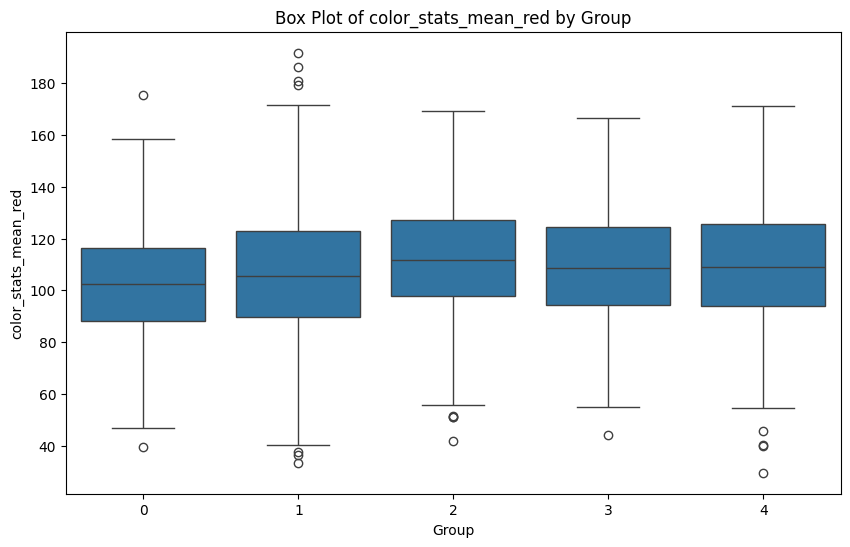

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for color_stats_mean_green:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   5.2831    0.0  2.2636  8.3027   True
     0      2   8.2716    0.0  5.2521 11.2912   True
     0      3   7.8222    0.0  4.8017 10.8428   True
     0      4   8.0967    0.0  5.0772 11.1163   True
     1      2   2.9885  0.054  -0.031   6.008  False
     1      3   2.5391 0.1469 -0.4815  5.5596  False
     1      4   2.8136 0.0816 -0.2059  5.8331  False
     2      3  -0.4494 0.9943   -3.47  2.5711  False
     2      4  -0.1749 0.9999 -3.1944  2.8446  False
     3      4   0.2745 0.9992  -2.746  3.2951  False
----------------------------------------------------


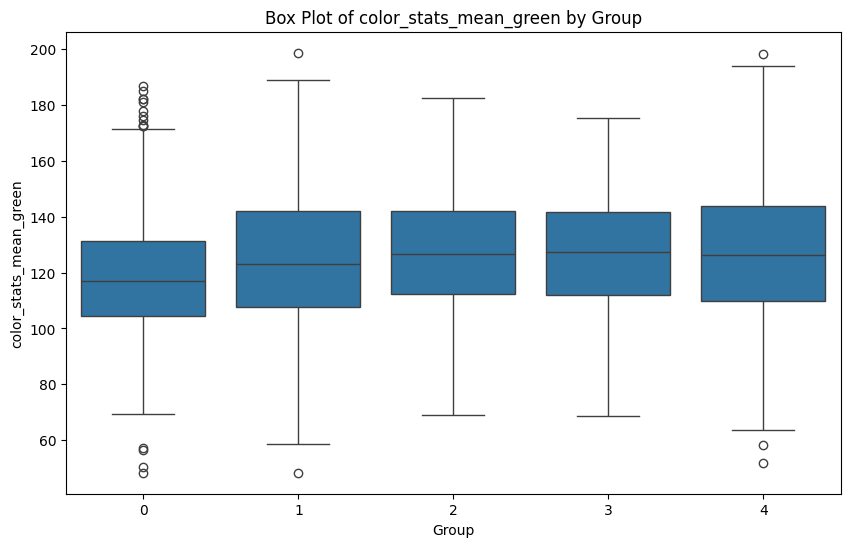

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for color_stats_mean_blue:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   4.5279 0.0101  0.7295  8.3263   True
     0      2  17.0093    0.0 13.2109 20.8077   True
     0      3  12.1528    0.0  8.3531 15.9525   True
     0      4  12.0746    0.0  8.2762  15.873   True
     1      2  12.4814    0.0   8.683 16.2797   True
     1      3   7.6249    0.0  3.8252 11.4245   True
     1      4   7.5467    0.0  3.7483 11.3451   True
     2      3  -4.8565 0.0045 -8.6562 -1.0568   True
     2      4  -4.9347 0.0036 -8.7331 -1.1363   True
     3      4  -0.0782    1.0 -3.8779  3.7215  False
----------------------------------------------------


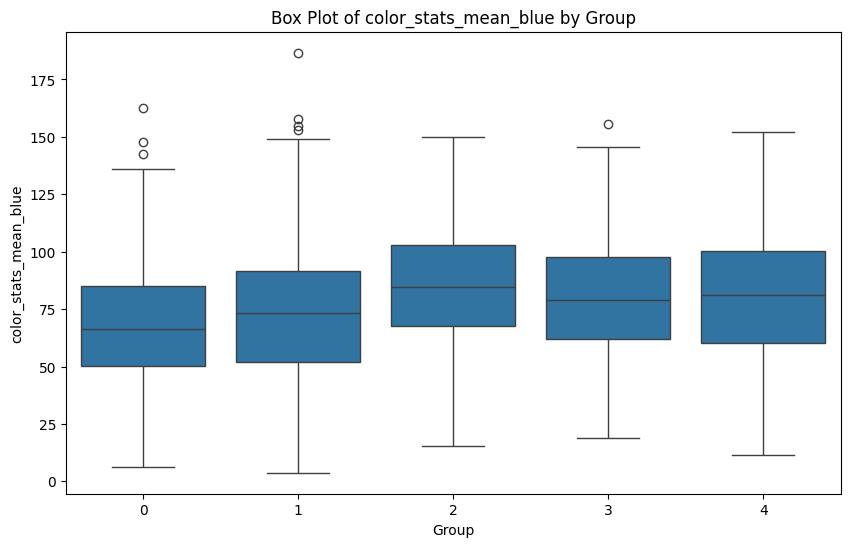

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for color_stats_std_red:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.9556    0.0 -4.2551  -1.656   True
     0      2  -1.8669 0.0009 -3.1664 -0.5673   True
     0      3  -0.6965 0.5873 -1.9965  0.6035  False
     0      4  -2.8345    0.0  -4.134 -1.5349   True
     1      2   1.0887 0.1495 -0.2109  2.3882  False
     1      3   2.2591    0.0  0.9591  3.5591   True
     1      4   0.1211 0.9991 -1.1785  1.4206  False
     2      3   1.1704 0.1008 -0.1296  2.4704  False
     2      4  -0.9676 0.2508 -2.2671   0.332  False
     3      4   -2.138 0.0001  -3.438  -0.838   True
----------------------------------------------------


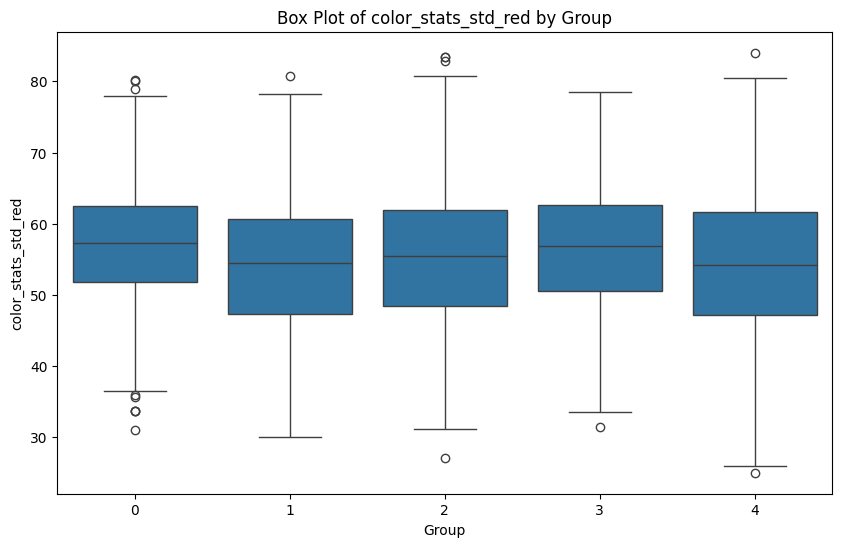

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for color_stats_std_blue:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -1.924 0.0024 -3.3606 -0.4875   True
     0      2   0.5365 0.8466    -0.9   1.973  False
     0      3  -0.3318 0.9702 -1.7688  1.1052  False
     0      4   0.0125    1.0  -1.424   1.449  False
     1      2   2.4605    0.0   1.024  3.8971   True
     1      3   1.5923 0.0212  0.1553  3.0293   True
     1      4   1.9365 0.0022     0.5  3.3731   True
     2      3  -0.8683 0.4661 -2.3053  0.5687  False
     2      4   -0.524 0.8575 -1.9605  0.9125  False
     3      4   0.3443  0.966 -1.0927  1.7813  False
----------------------------------------------------


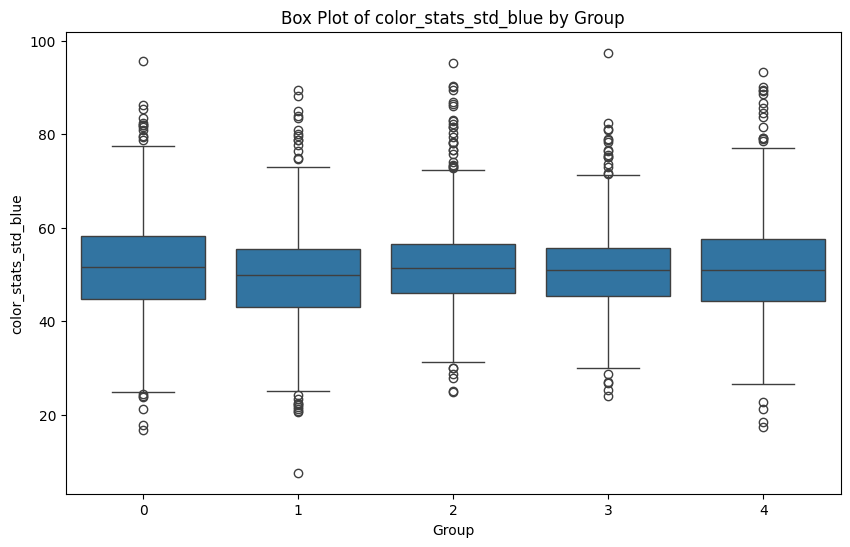

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for dominant_colors_color_0:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.9037 0.6909  -4.2879 12.0952  False
     0      2   8.3392 0.0436   0.1477 16.5308   True
     0      3   7.4195 0.0975  -0.7748 15.6139  False
     0      4   6.4111  0.205  -1.7804 14.6027  False
     1      2   4.4355 0.5771   -3.756 12.6271  False
     1      3   3.5159  0.768  -4.6785 11.7102  False
     1      4   2.5075 0.9196  -5.6841  10.699  False
     2      3  -0.9197 0.9981   -9.114  7.2746  False
     2      4  -1.9281 0.9681 -10.1196  6.2635  False
     3      4  -1.0084 0.9973  -9.2027  7.1859  False
-----------------------------------------------------


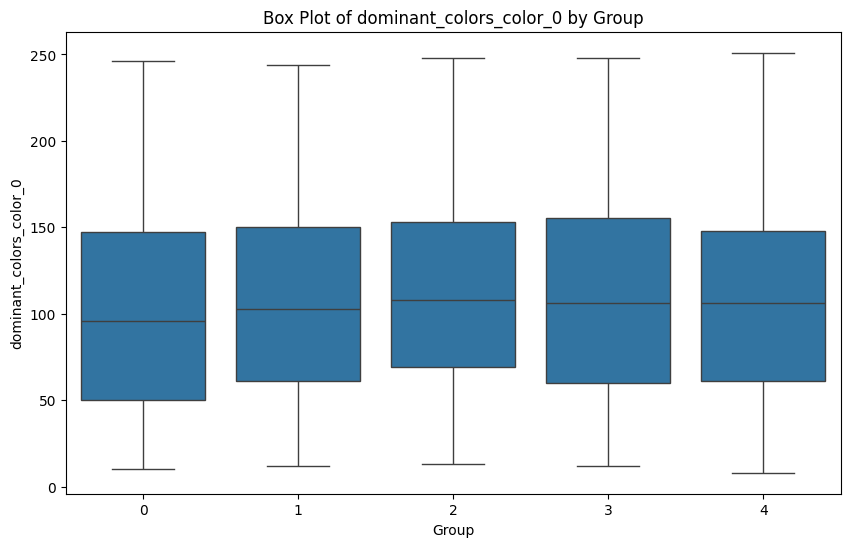

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for dominant_colors_color_2:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.4003 0.7629  -4.4638 11.2644  False
     0      2  15.3134    0.0   7.4493 23.1775   True
     0      3  12.1669 0.0002   4.3001 20.0337   True
     0      4  11.0624 0.0012   3.1983 18.9265   True
     1      2  11.9132 0.0004    4.049 19.7773   True
     1      3   8.7666 0.0201   0.8998 16.6334   True
     1      4   7.6621 0.0604   -0.202 15.5263  False
     2      3  -3.1465  0.811 -11.0133  4.7202  False
     2      4   -4.251 0.5787 -12.1151  3.6131  False
     3      4  -1.1045 0.9954  -8.9713  6.7623  False
-----------------------------------------------------


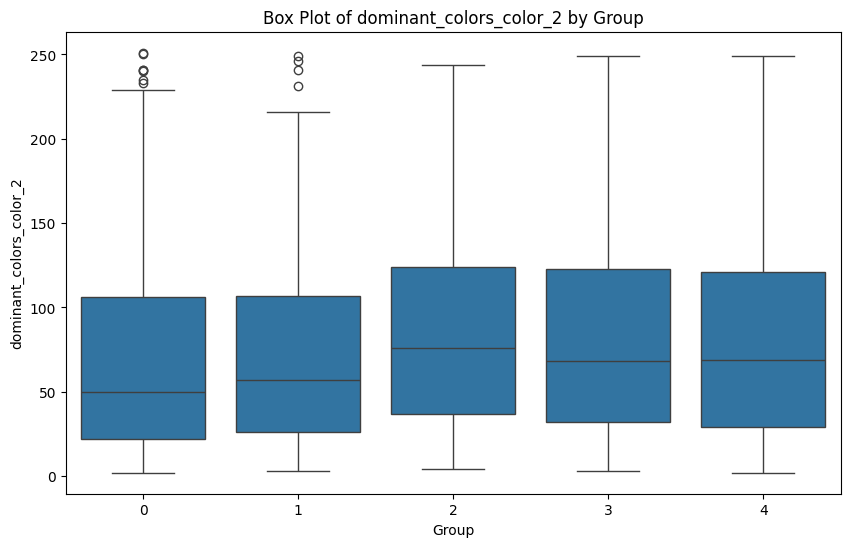

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for dominant_colors_color_4:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   2.1262 0.9684  -6.9292 11.1815  False
     0      2   2.5739 0.9376  -6.4814 11.6293  False
     0      3   8.6297 0.0705  -0.4288 17.6881  False
     0      4   7.5753 0.1505    -1.48 16.6306  False
     1      2   0.4478 0.9999  -8.6076  9.5031  False
     1      3   6.5035 0.2863  -2.5549 15.5619  False
     1      4   5.4491 0.4703  -3.6062 14.5045  False
     2      3   6.0557 0.3595  -3.0027 15.1141  False
     2      4   5.0014 0.5577   -4.054 14.0567  False
     3      4  -1.0544 0.9978 -10.1128  8.0041  False
-----------------------------------------------------


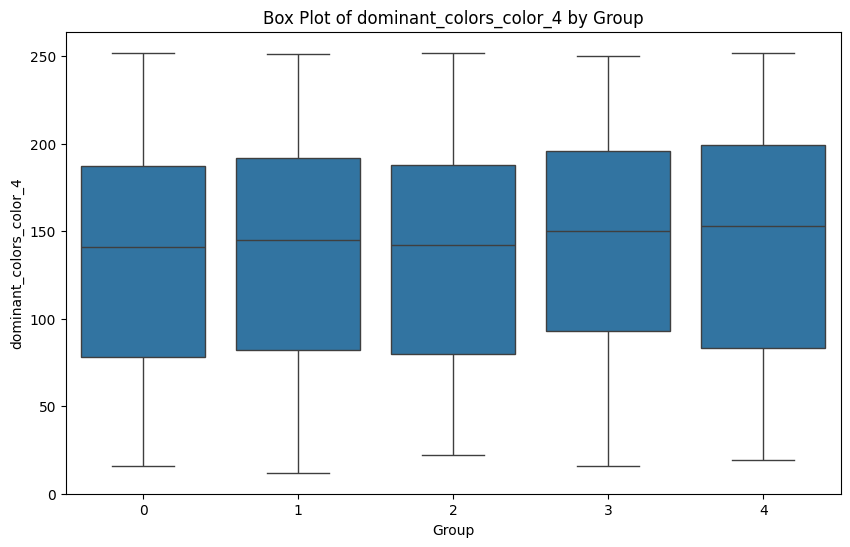

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for dominant_colors_color_5:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.8833 0.7674  -5.1593 12.9259  False
     0      2  14.0393 0.0002   4.9968 23.0819   True
     0      3  11.2406 0.0063    2.195 20.2863   True
     0      4  13.6445 0.0004   4.6019 22.6871   True
     1      2   10.156 0.0186   1.1135 19.1986   True
     1      3   7.3573 0.1725  -1.6883  16.403  False
     1      4   9.7612 0.0268   0.7186 18.8038   True
     2      3  -2.7987 0.9167 -11.8444  6.2469  False
     2      4  -0.3948    1.0  -9.4374  8.6477  False
     3      4   2.4039 0.9507  -6.6418 11.4495  False
-----------------------------------------------------


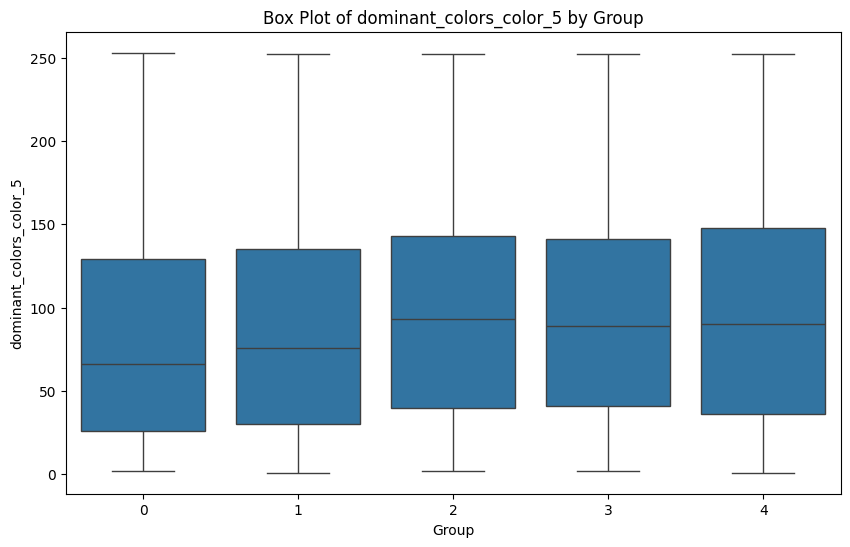

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-val

Tukey's HSD results for dominant_colors_color_8:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -0.9878 0.9982  -9.9089  7.9333  False
     0      2     8.81 0.0548  -0.1111 17.7312  False
     0      3   3.4443 0.8303  -5.4799 12.3684  False
     0      4   4.9471 0.5538   -3.974 13.8682  False
     1      2   9.7978  0.023   0.8767 18.7189   True
     1      3    4.432 0.6564  -4.4921 13.3562  False
     1      4   5.9349 0.3646  -2.9862  14.856  False
     2      3  -5.3658 0.4712 -14.2899  3.5584  False
     2      4   -3.863 0.7619 -12.7841  5.0582  False
     3      4   1.5028 0.9908  -7.4213  10.427  False
-----------------------------------------------------


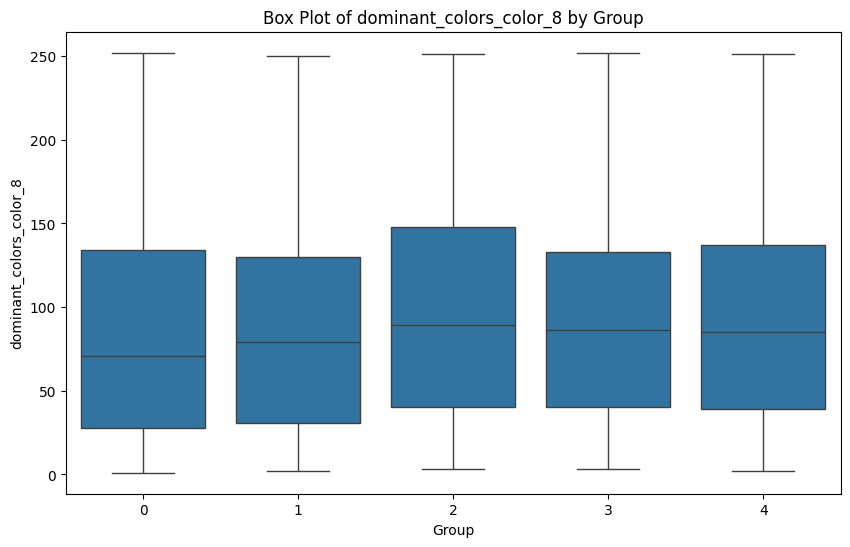

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-val

Tukey's HSD results for dominant_colors_color_11:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -2.4111  0.939 -10.9491  6.1269  False
     0      2   11.578  0.002     3.04  20.116   True
     0      3   5.2995 0.4381  -3.2414 13.8405  False
     0      4   4.0556 0.6935  -4.4824 12.5936  False
     1      2  13.9891 0.0001   5.4511 22.5272   True
     1      3   7.7107 0.0992  -0.8302 16.2516  False
     1      4   6.4668 0.2347  -2.0713 15.0048  False
     2      3  -6.2785 0.2631 -14.8194  2.2624  False
     2      4  -7.5224 0.1143 -16.0604  1.0156  False
     3      4  -1.2439 0.9947  -9.7848   7.297  False
-----------------------------------------------------


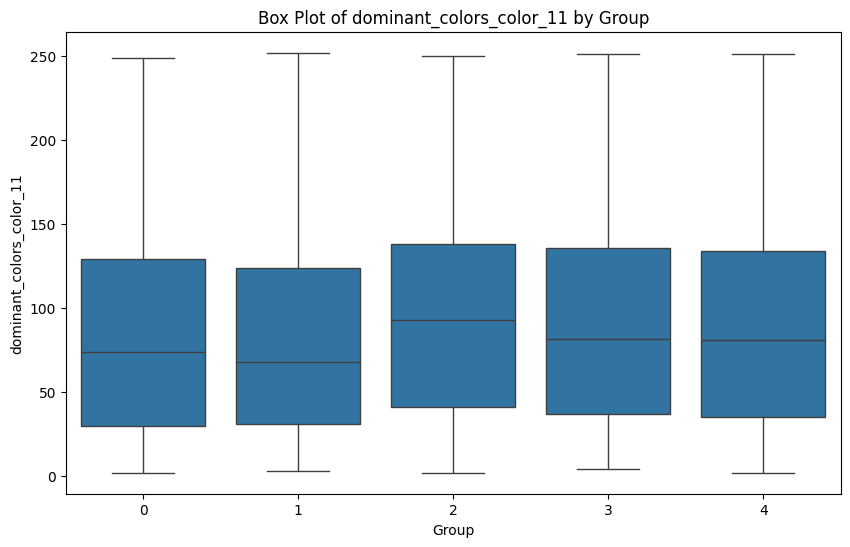

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-val

Tukey's HSD results for dominant_colors_color_14:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.4627 0.7625  -4.5408 11.4662  False
     0      2   9.1425 0.0158    1.139 17.1459   True
     0      3   6.5331 0.1699  -1.4731 14.5393  False
     0      4   8.5346 0.0298   0.5311 16.5381   True
     1      2   5.6798 0.2979  -2.3237 13.6832  False
     1      3   3.0704 0.8335  -4.9357 11.0766  False
     1      4   5.0719 0.4158  -2.9316 13.0754  False
     2      3  -2.6093 0.9009 -10.6155  5.3968  False
     2      4  -0.6079 0.9996  -8.6113  7.3956  False
     3      4   2.0015 0.9603  -6.0047 10.0077  False
-----------------------------------------------------


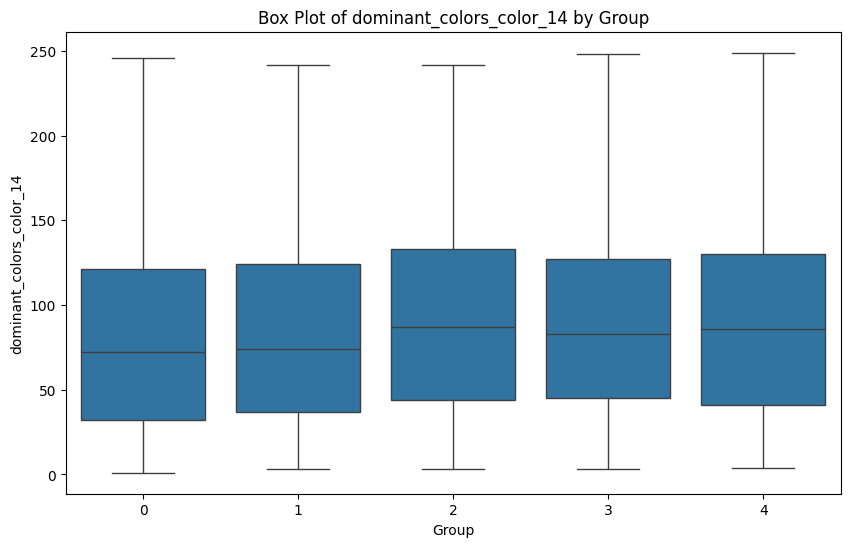

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for edge_intensity_stats_mean_intensity:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0008 0.9688 -0.0041  0.0025  False
     0      2   0.0117    0.0  0.0083   0.015   True
     0      3   0.0169    0.0  0.0135  0.0202   True
     0      4   0.0044 0.0027  0.0011  0.0078   True
     1      2   0.0124    0.0  0.0091  0.0158   True
     1      3   0.0177    0.0  0.0143   0.021   True
     1      4   0.0052 0.0002  0.0019  0.0085   True
     2      3   0.0052 0.0002  0.0019  0.0086   True
     2      4  -0.0072    0.0 -0.0106 -0.0039   True
     3      4  -0.0124    0.0 -0.0158 -0.0091   True
----------------------------------------------------


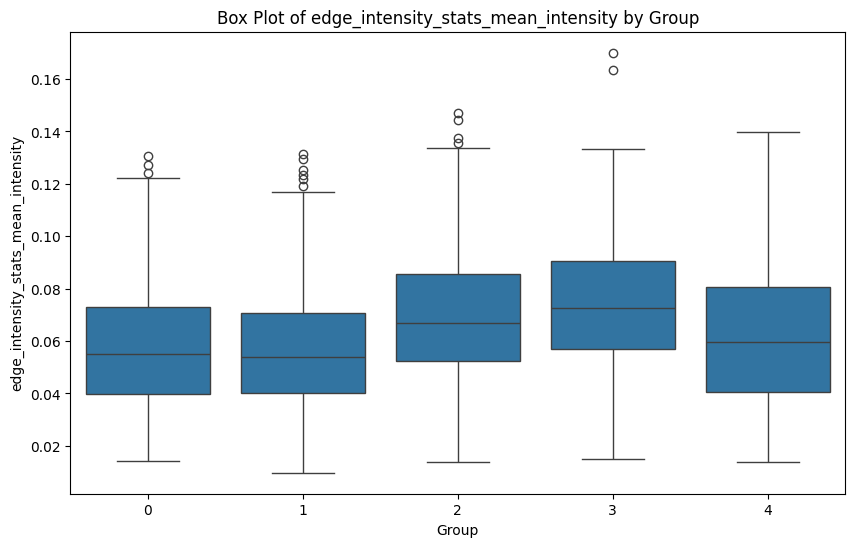

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for edge_intensity_stats_std_intensity:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0038 0.0028 -0.0066 -0.0009   True
     0      2   0.0042 0.0006  0.0013   0.007   True
     0      3   0.0075    0.0  0.0047  0.0103   True
     0      4    0.002 0.2992 -0.0008  0.0049  False
     1      2   0.0079    0.0  0.0051  0.0108   True
     1      3   0.0113    0.0  0.0084  0.0141   True
     1      4   0.0058    0.0  0.0029  0.0086   True
     2      3   0.0033  0.012  0.0005  0.0062   True
     2      4  -0.0021   0.24  -0.005  0.0007  False
     3      4  -0.0055    0.0 -0.0083 -0.0026   True
----------------------------------------------------


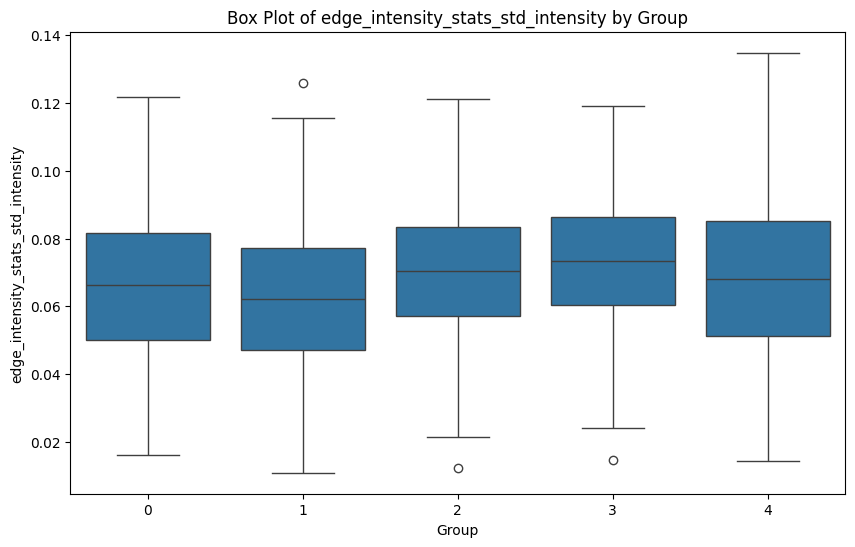

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for frequency_stats_mean_magnitude:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0307 0.7634 -0.1017  0.0403  False
     0      2   0.1695    0.0  0.0985  0.2405   True
     0      3   0.2252    0.0  0.1541  0.2962   True
     0      4   0.0784 0.0218  0.0074  0.1494   True
     1      2   0.2002    0.0  0.1292  0.2712   True
     1      3   0.2558    0.0  0.1848  0.3269   True
     1      4   0.1091 0.0003  0.0381  0.1801   True
     2      3   0.0556 0.2043 -0.0154  0.1267  False
     2      4  -0.0911 0.0043 -0.1621 -0.0201   True
     3      4  -0.1467    0.0 -0.2177 -0.0757   True
----------------------------------------------------


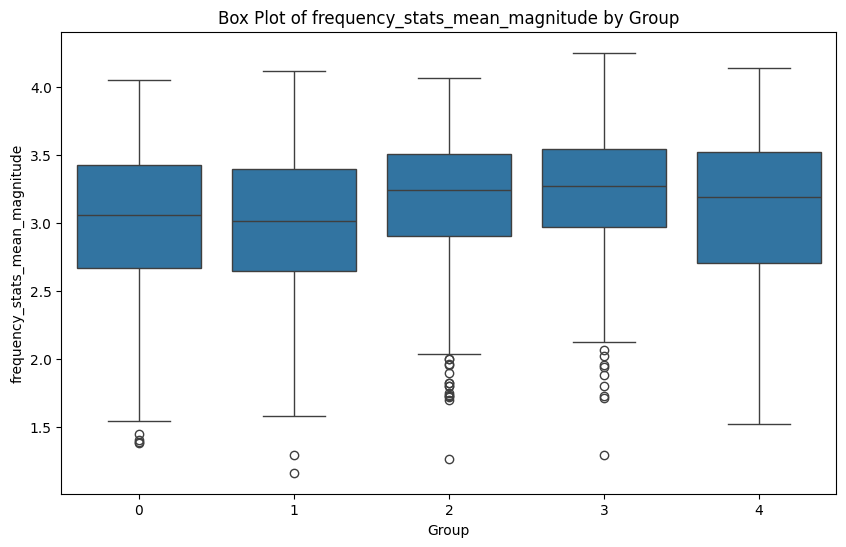

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for frequency_stats_std_magnitude:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0075 0.3916  -0.019  0.0041  False
     0      2   -0.003 0.9526 -0.0146  0.0085  False
     0      3   0.0103 0.1073 -0.0013  0.0218  False
     0      4  -0.0101 0.1188 -0.0216  0.0014  False
     1      2   0.0044 0.8308 -0.0071   0.016  False
     1      3   0.0178 0.0003  0.0062  0.0293   True
     1      4  -0.0026 0.9722 -0.0141  0.0089  False
     2      3   0.0133 0.0143  0.0018  0.0248   True
     2      4  -0.0071 0.4524 -0.0186  0.0045  False
     3      4  -0.0204    0.0 -0.0319 -0.0088   True
----------------------------------------------------


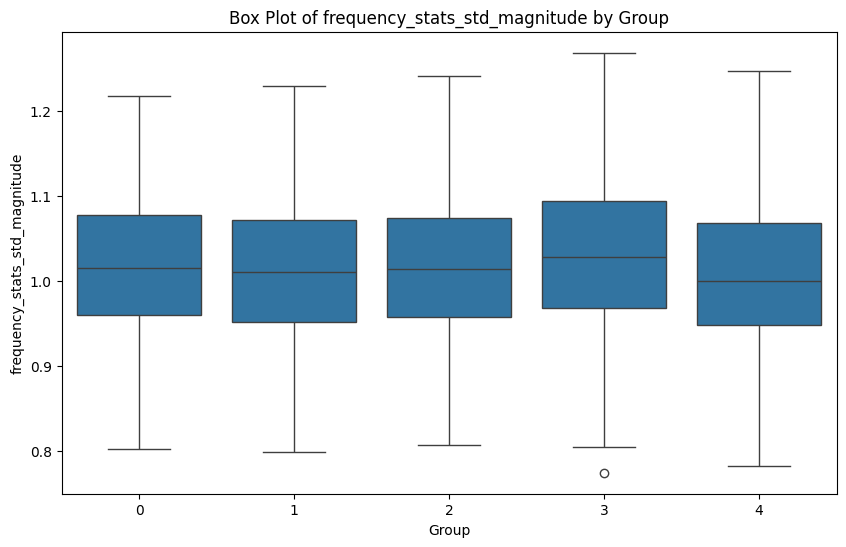

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for intensity_stats_mean_intensity:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0195    0.0  0.0084 0.0305   True
     0      2   0.0359    0.0  0.0249 0.0469   True
     0      3   0.0311    0.0    0.02 0.0421   True
     0      4   0.0316    0.0  0.0205 0.0426   True
     1      2   0.0164 0.0005  0.0054 0.0275   True
     1      3   0.0116 0.0335  0.0006 0.0226   True
     1      4   0.0121 0.0231  0.0011 0.0231   True
     2      3  -0.0048 0.7536 -0.0159 0.0062  False
     2      4  -0.0043 0.8207 -0.0154 0.0067  False
     3      4   0.0005 0.9999 -0.0105 0.0115  False
---------------------------------------------------


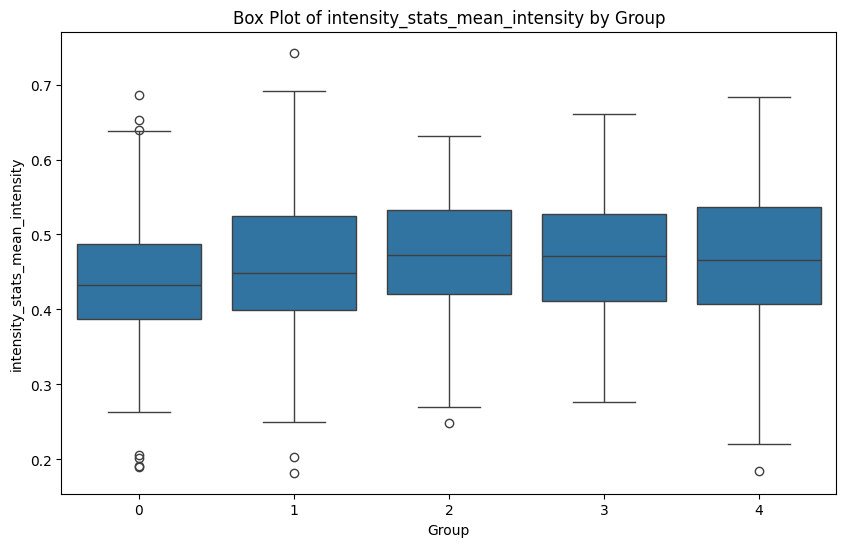

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for pca_stats_pca_component_1:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.8354    0.0  1.7851  3.8857   True
     0      2   3.2793    0.0  2.2289  4.3296   True
     0      3   3.2489    0.0  2.1983  4.2996   True
     0      4   1.3952 0.0027  0.3449  2.4456   True
     1      2   0.4439 0.7779 -0.6065  1.4942  False
     1      3   0.4136 0.8199 -0.6371  1.4642  False
     1      4  -1.4402 0.0017 -2.4905 -0.3898   True
     2      3  -0.0303    1.0  -1.081  1.0204  False
     2      4   -1.884    0.0 -2.9344 -0.8337   True
     3      4  -1.8537    0.0 -2.9044  -0.803   True
----------------------------------------------------


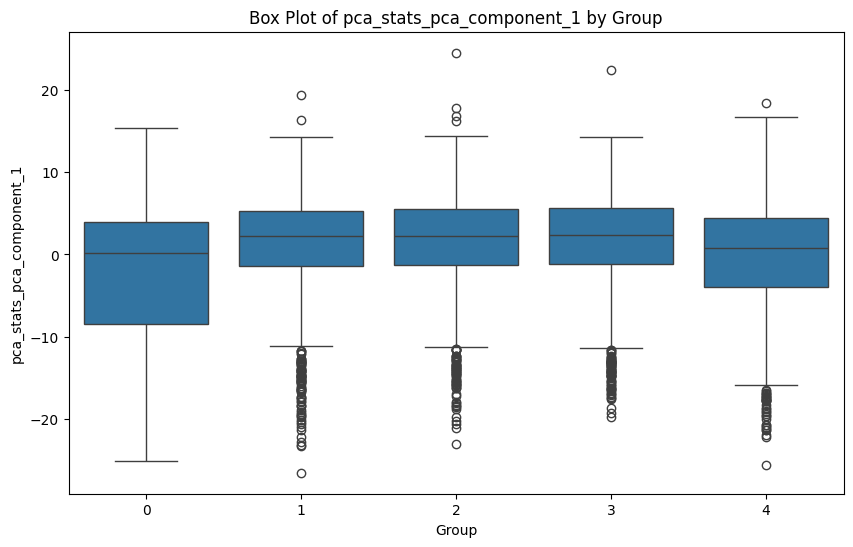

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for pca_stats_pca_component_2:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.7598    0.0  0.3092  1.2104   True
     0      2   1.8593    0.0  1.4087    2.31   True
     0      3   2.0789    0.0  1.6281  2.5297   True
     0      4   0.7118 0.0002  0.2612  1.1624   True
     1      2   1.0996    0.0   0.649  1.5502   True
     1      3   1.3191    0.0  0.8683  1.7699   True
     1      4   -0.048 0.9984 -0.4986  0.4026  False
     2      3   0.2195  0.673 -0.2312  0.6703  False
     2      4  -1.1475    0.0 -1.5982 -0.6969   True
     3      4  -1.3671    0.0 -1.8179 -0.9163   True
----------------------------------------------------


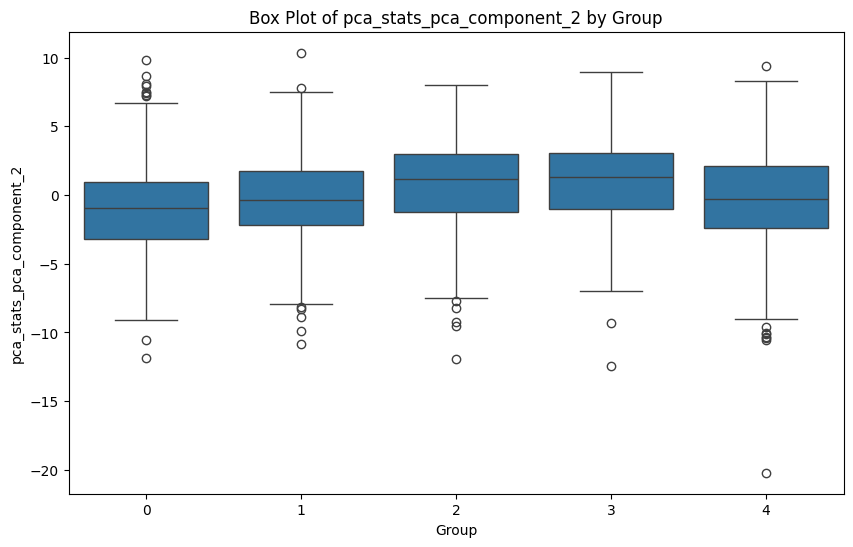

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for hog_stats_mean_hog:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0008 0.0862 -0.0001  0.0016  False
     0      2   0.0025    0.0  0.0016  0.0033   True
     0      3   0.0026    0.0  0.0018  0.0034   True
     0      4   0.0005  0.566 -0.0004  0.0013  False
     1      2   0.0017    0.0  0.0009  0.0025   True
     1      3   0.0018    0.0   0.001  0.0027   True
     1      4  -0.0003 0.8433 -0.0012  0.0005  False
     2      3   0.0001 0.9946 -0.0007   0.001  False
     2      4   -0.002    0.0 -0.0029 -0.0012   True
     3      4  -0.0021    0.0  -0.003 -0.0013   True
----------------------------------------------------


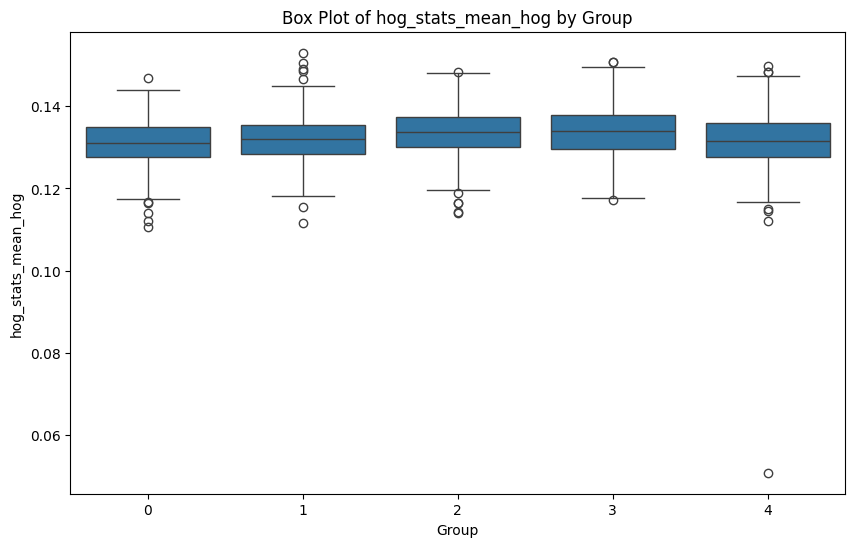

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for hog_stats_std_hog:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0011 0.0632 -0.0021     0.0  False
     0      2  -0.0034    0.0 -0.0045 -0.0023   True
     0      3  -0.0036    0.0 -0.0047 -0.0025   True
     0      4   -0.001 0.1204  -0.002  0.0001  False
     1      2  -0.0023    0.0 -0.0034 -0.0012   True
     1      3  -0.0026    0.0 -0.0036 -0.0015   True
     1      4   0.0001  0.999  -0.001  0.0012  False
     2      3  -0.0002  0.983 -0.0013  0.0009  False
     2      4   0.0024    0.0  0.0014  0.0035   True
     3      4   0.0027    0.0  0.0016  0.0037   True
----------------------------------------------------


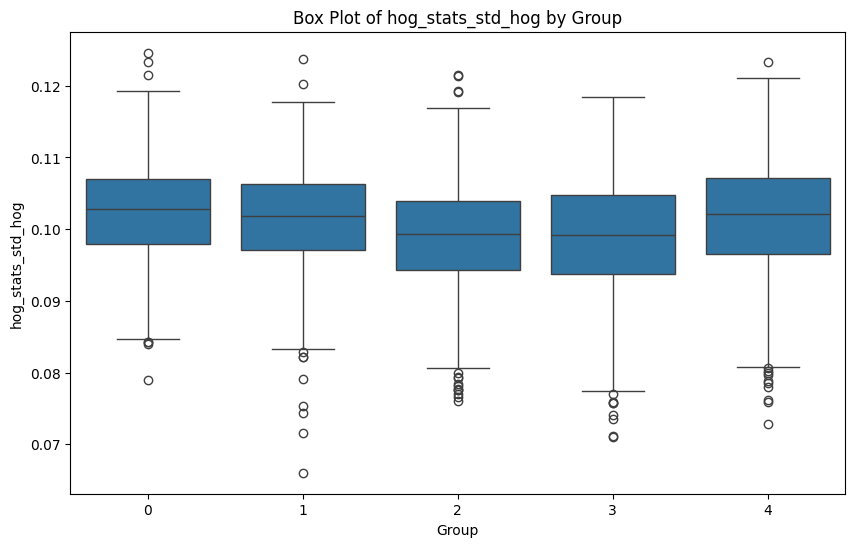

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for orientation_stats_mean_orientation:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0001    1.0 -0.0074  0.0076  False
     0      2   0.0266    0.0  0.0191  0.0341   True
     0      3   0.0336    0.0  0.0261   0.041   True
     0      4   0.0056 0.2539 -0.0019  0.0131  False
     1      2   0.0264    0.0  0.0189  0.0339   True
     1      3   0.0334    0.0  0.0259  0.0409   True
     1      4   0.0054 0.2773 -0.0021  0.0129  False
     2      3    0.007 0.0819 -0.0005  0.0145  False
     2      4   -0.021    0.0 -0.0285 -0.0135   True
     3      4   -0.028    0.0 -0.0355 -0.0205   True
----------------------------------------------------


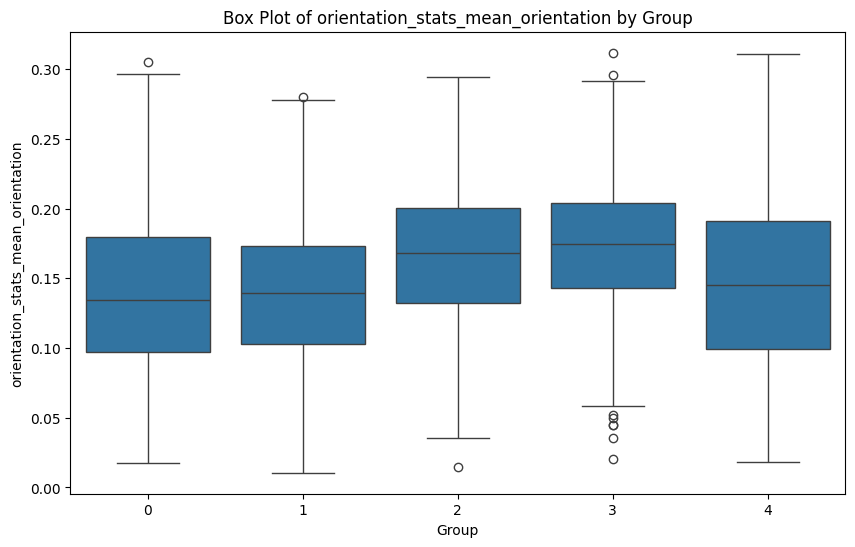

<ipython-input-71-84320da0bc66>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance


Tukey's HSD results for orientation_stats_std_orientation:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0246 0.0417  0.0006  0.0486   True
     0      2   0.1259    0.0  0.1019  0.1499   True
     0      3   0.1561    0.0  0.1321  0.1801   True
     0      4   0.0338 0.0012  0.0097  0.0578   True
     1      2   0.1013    0.0  0.0773  0.1253   True
     1      3   0.1315    0.0  0.1075  0.1555   True
     1      4   0.0092 0.8362 -0.0149  0.0332  False
     2      3   0.0302 0.0055  0.0062  0.0542   True
     2      4  -0.0921    0.0 -0.1162 -0.0681   True
     3      4  -0.1223    0.0 -0.1464 -0.0983   True
----------------------------------------------------


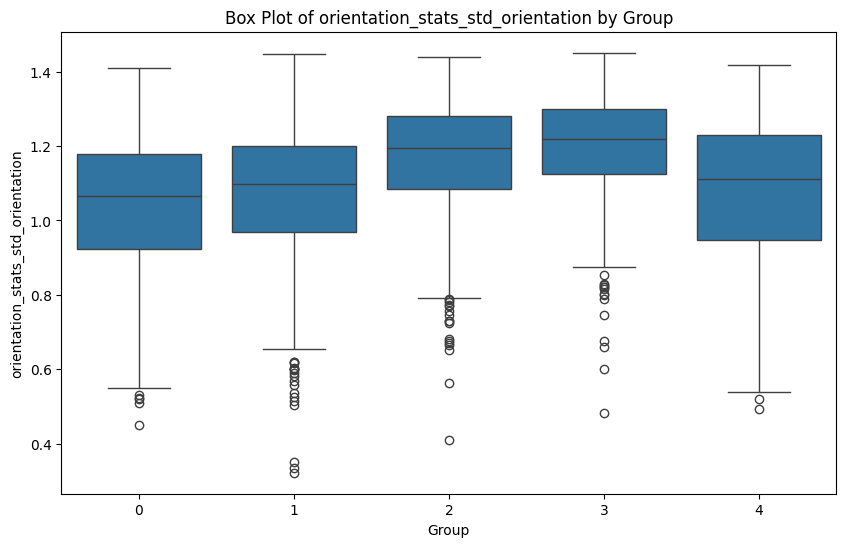


Summary of Tukey's HSD for color_stats_mean_red:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    4.042 0.0037  0.9278  7.1561   True
     0      2   9.4627    0.0  6.3486 12.5769   True
     0      3    6.825    0.0  3.7097  9.9402   True
     0      4   6.5282    0.0   3.414  9.6423   True
     1      2   5.4208    0.0  2.3066  8.5349   True
     1      3    2.783 0.1055 -0.3322  5.8982  False
     1      4   2.4862 0.1879  -0.628  5.6004  False
     2      3  -2.6378 0.1416  -5.753  0.4774  False
     2      4  -2.9346 0.0758 -6.0487  0.1796  False
     3      4  -0.2968  0.999  -3.412  2.8184  False
----------------------------------------------------

Summary of Tukey's HSD for color_stats_mean_green:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

df = features_train_df # pd.DataFrame(data)

# Identify numerical columns (excluding the 'label' column)
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('label')

# Prepare the plots and Tukey's HSD results
results = {}

for col in numerical_cols:
    # Perform ANOVA
    model = ols(f'{col} ~ C(label)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Only run Tukey's HSD if ANOVA is significant
    if anova_table['PR(>F)'][0] < 0.05:  # Check p-value for significance
        tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df[col], groups=df['label'], alpha=0.05)
        results[col] = tukey

        # Print Tukey's HSD results
        print(f"Tukey's HSD results for {col}:")
        print(tukey)

        # Plotting
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='label', y=col, data=df)
        plt.title(f'Box Plot of {col} by Group')
        plt.ylabel(col)
        plt.xlabel('Group')
        plt.show()

# Optionally print a summary of the results
for col, result in results.items():
    print(f"\nSummary of Tukey's HSD for {col}:")
    print(result)

In [75]:
features_train_df_healthy_binary = features_train_df.copy()
features_train_df_healthy_binary['healthy'] = 1 * (features_train_df_healthy_binary['label'] == 4)

In [79]:
import pandas as pd
from scipy.stats import ttest_ind

# Function to run t-tests for all numerical columns in the DataFrame
def run_t_tests(df):
    # Select numerical columns excluding the 'healthy' column
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    if 'healthy' in numerical_cols:
        numerical_cols.remove('healthy')  # Remove 'healthy' from numerical columns
        numerical_cols.remove('label')
        # Store results
        results = {}

        # Perform t-test for each numerical column
        for col in numerical_cols:
            # Group by 'healthy' status
            healthy_group = df[df['healthy'] == 1][col].dropna()
            unhealthy_group = df[df['healthy'] == 0][col].dropna()

            # Run t-test
            t_stat, p_value = ttest_ind(healthy_group, unhealthy_group, equal_var=False)

            # Store results
            results[col] = {
                't_statistic': t_stat,
                'p_value': p_value
            }

        return results
    else:
        return "The 'healthy' column is missing in the DataFrame."

# Run the t-tests and get the results
t_test_results = run_t_tests(df=features_train_df_healthy_binary)

# Print results
print('ALL RESULTS:')
for feature, result in t_test_results.items():
    print(f'T-test for {feature}: t-statistic = {result["t_statistic"]:.3f}, p-value = {result["p_value"]:.3f}')

print('')
print('SIGNIFICANT RESULTS:')
for feature, result in t_test_results.items():
    if result['p_value'] < 0.05:
      print(f'T-test for {feature}: t-statistic = {result["t_statistic"]:.3f}, p-value = {result["p_value"]:.3f}')

ALL RESULTS:
T-test for color_stats_mean_red: t-statistic = 1.562, p-value = 0.118
T-test for color_stats_mean_green: t-statistic = 2.989, p-value = 0.003
T-test for color_stats_mean_blue: t-statistic = 3.159, p-value = 0.002
T-test for color_stats_std_red: t-statistic = -3.550, p-value = 0.000
T-test for color_stats_std_green: t-statistic = -1.201, p-value = 0.230
T-test for color_stats_std_blue: t-statistic = 1.008, p-value = 0.314
T-test for dominant_colors_color_0: t-statistic = 0.638, p-value = 0.524
T-test for dominant_colors_color_1: t-statistic = 0.804, p-value = 0.421
T-test for dominant_colors_color_2: t-statistic = 1.446, p-value = 0.149
T-test for dominant_colors_color_3: t-statistic = 1.131, p-value = 0.258
T-test for dominant_colors_color_4: t-statistic = 1.593, p-value = 0.111
T-test for dominant_colors_color_5: t-statistic = 2.347, p-value = 0.019
T-test for dominant_colors_color_6: t-statistic = -0.085, p-value = 0.932
T-test for dominant_colors_color_7: t-statistic = 